In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import linear_model

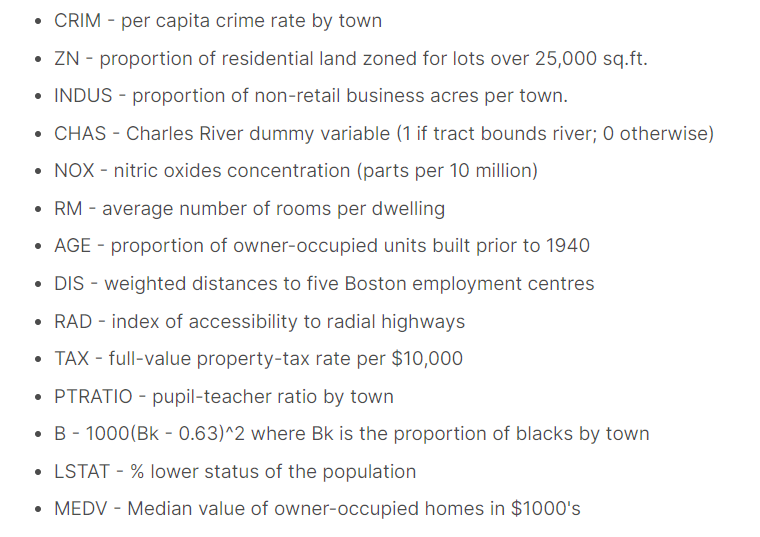

In [6]:
#Load the data
data = pd.read_csv("boston.csv")
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [8]:
#Create feature and target array from such given data
X = data.drop('medv', axis=1).values
y = data['medv'].values

In [9]:
#Predicting house value from a single feature (No.of rooms)
X_rooms = X[:, 5]

In [10]:
type(X_rooms), type(y)

(numpy.ndarray, numpy.ndarray)

In [11]:
X_rooms.shape, y.shape

((506,), (506,))

In [12]:
X_rooms = X_rooms.reshape(-1,1)
y = y.reshape(-1, 1)

In [13]:
X_rooms.shape, y.shape


((506, 1), (506, 1))

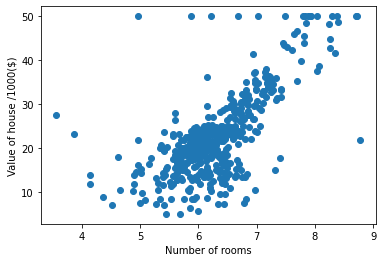

In [17]:
#plotting house value vs. no.of rooms
plt.scatter(X_rooms, y)
plt.xlabel('Number of rooms')
plt.ylabel('Value of house /1000($)')
plt.show()

In [18]:
#Fitting a regression model
reg = linear_model.LinearRegression()
reg.fit(X_rooms, y)

LinearRegression()

In [31]:
#Evaluating the model on training data only
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
y_pred = reg.predict(X_rooms)

print(f'MAE = {mean_absolute_error(y, y_pred)}')
print(f'MSE = {mean_squared_error(y, y_pred)}')
print(f'RMSE = {np.sqrt(mean_squared_error(y, y_pred))}')
print(f'R_2 = {r2_score(y, y_pred)}')

MAE = 4.4477729015322325
MSE = 43.60055177116956
RMSE = 6.603071389222561
R_2 = 0.48352545599133423


In [19]:
prediction_space = np.linspace(min(X_rooms), max(X_rooms)).reshape(-1,1)

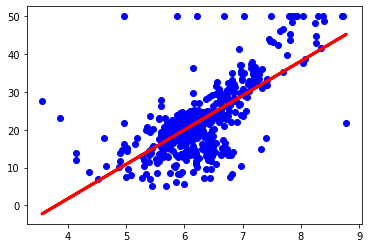

In [26]:
plt.scatter(X_rooms, y, color='blue')
plt.plot(X_rooms, reg.predict(X_rooms), color='red', linewidth=3)
plt.show()

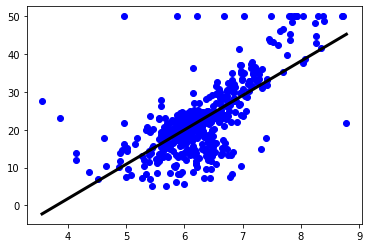

In [24]:
plt.scatter(X_rooms, y, color='blue')
plt.plot(prediction_space, reg.predict(prediction_space), color='black', linewidth=3)
plt.show()